In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [59]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [60]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [61]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [62]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace(" ","_")

In [63]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [65]:
df.drop("market_category" ,axis=1 ,inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   vehicle_size       11914 non-null  object 
 10  vehicle_style      11914 non-null  object 
 11  highway_mpg        11914 non-null  int64  
 12  city_mpg           11914 non-null  int64  
 13  popularity         11914 non-null  int64  
 14  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


HANDEL MISSING VALUES

In [67]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [68]:
df["engine_hp"].fillna(np.mean(df["engine_hp"]) ,inplace=True)
df["engine_cylinders"].fillna(np.mean(df["engine_cylinders"]) ,inplace=True)

In [69]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     3
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11905 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11905 non-null  object 
 1   model              11905 non-null  object 
 2   year               11905 non-null  int64  
 3   engine_fuel_type   11905 non-null  object 
 4   engine_hp          11905 non-null  float64
 5   engine_cylinders   11905 non-null  float64
 6   transmission_type  11905 non-null  object 
 7   driven_wheels      11905 non-null  object 
 8   number_of_doors    11905 non-null  float64
 9   vehicle_size       11905 non-null  object 
 10  vehicle_style      11905 non-null  object 
 11  highway_mpg        11905 non-null  int64  
 12  city_mpg           11905 non-null  int64  
 13  popularity         11905 non-null  int64  
 14  msrp               11905 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.5+ MB


In [72]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11905.000000,11905.000000,11905.000000,11905.000000,11905.000000,11905.000000,11905.000000,1.190500e+04
mean,2010.383368,249.376120,5.630564,3.435951,26.606468,19.701806,1555.148257,4.056021e+04
std,7.581016,108.843809,1.774273,0.881381,8.724114,8.846138,1442.252333,6.007645e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<AxesSubplot:>

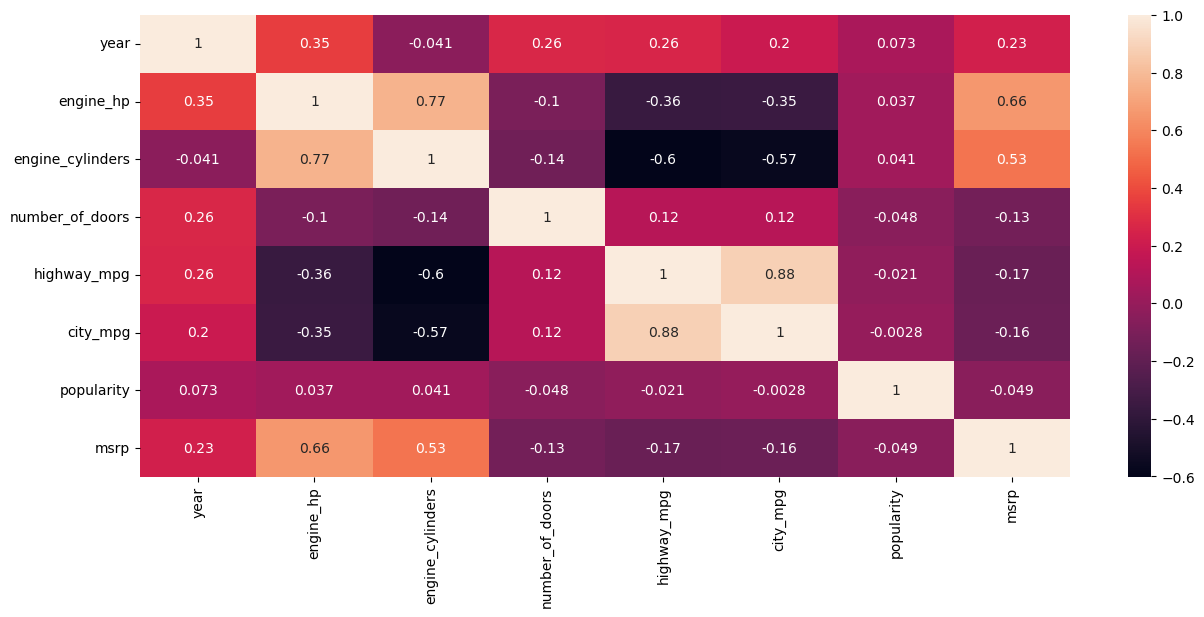

In [73]:
plt.figure(figsize=((15,6)))
sns.heatmap(df.corr() , annot=True)

In [74]:
df.drop(["popularity","city_mpg","highway_mpg","number_of_doors"] , axis=1 ,inplace=True)

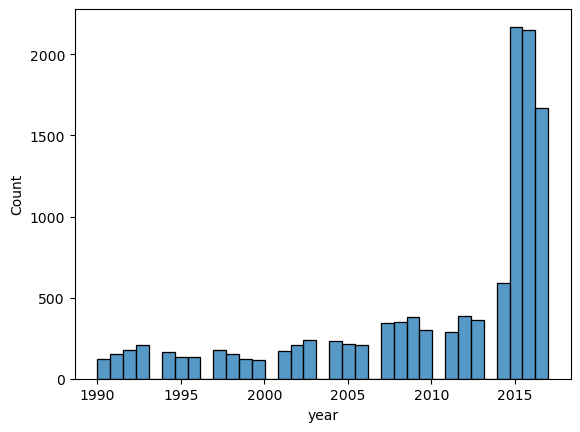

In [75]:
sns.histplot(df["year"])
plt.show()

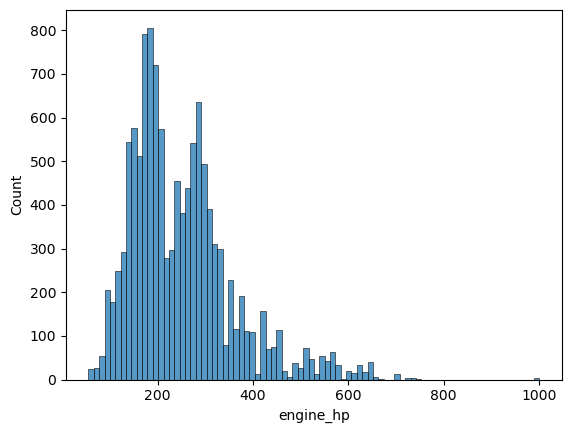

In [76]:
sns.histplot(df["engine_hp"])
plt.show()

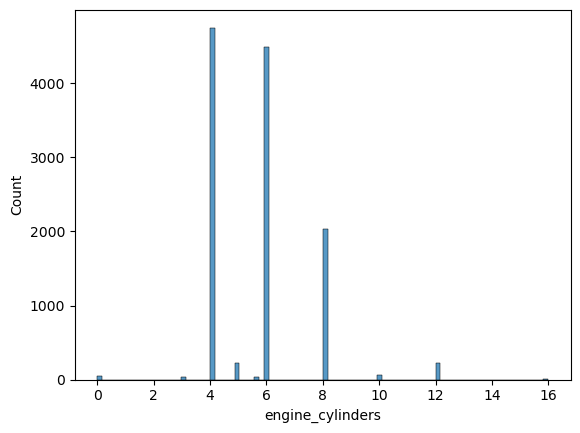

In [77]:
sns.histplot(df["engine_cylinders"])
plt.show()


<AxesSubplot:xlabel='msrp', ylabel='Count'>

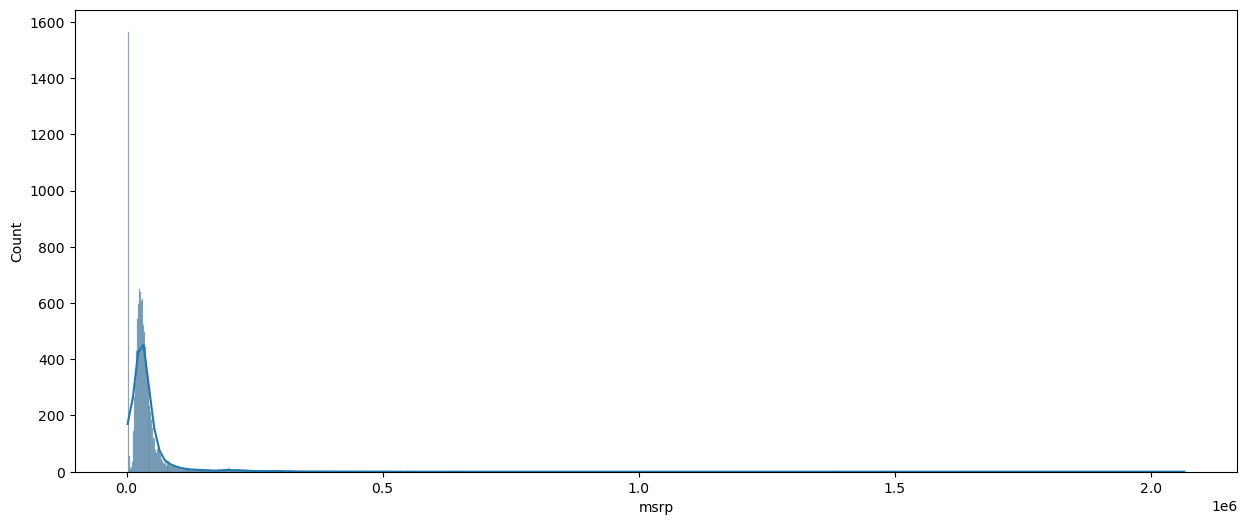

In [78]:
plt.figure(figsize=((15,6)))
sns.histplot(df["msrp"],kde=True)

handel outliers

In [79]:
df = df[df["msrp"]<1e6]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11899 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11899 non-null  object 
 1   model              11899 non-null  object 
 2   year               11899 non-null  int64  
 3   engine_fuel_type   11899 non-null  object 
 4   engine_hp          11899 non-null  float64
 5   engine_cylinders   11899 non-null  float64
 6   transmission_type  11899 non-null  object 
 7   driven_wheels      11899 non-null  object 
 8   vehicle_size       11899 non-null  object 
 9   vehicle_style      11899 non-null  object 
 10  msrp               11899 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


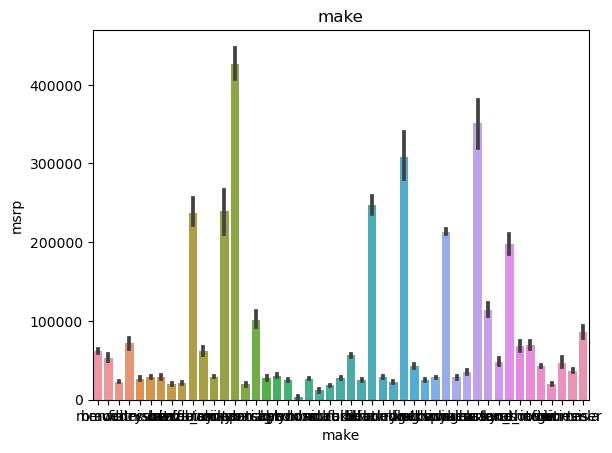

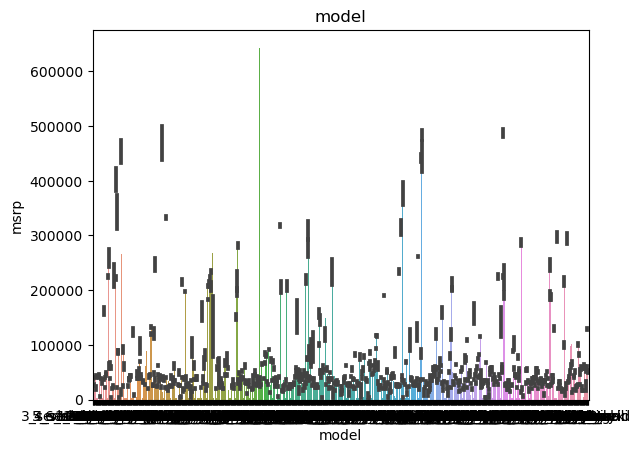

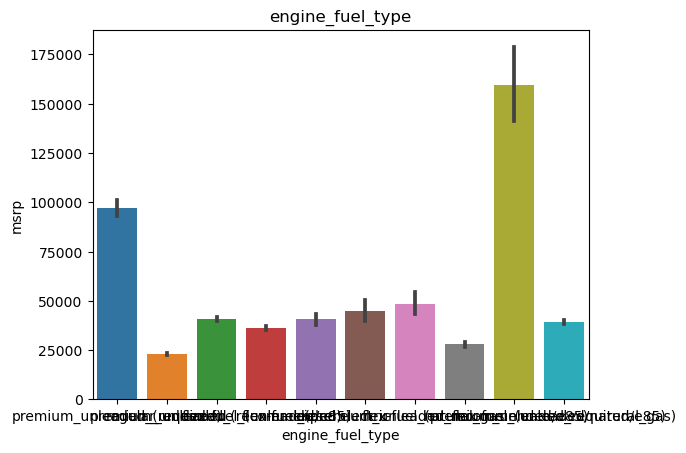

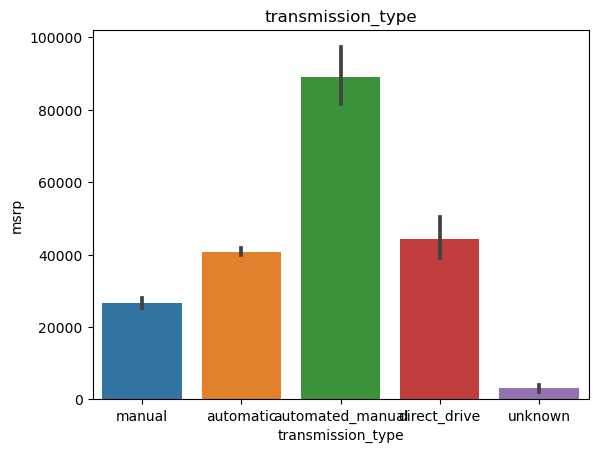

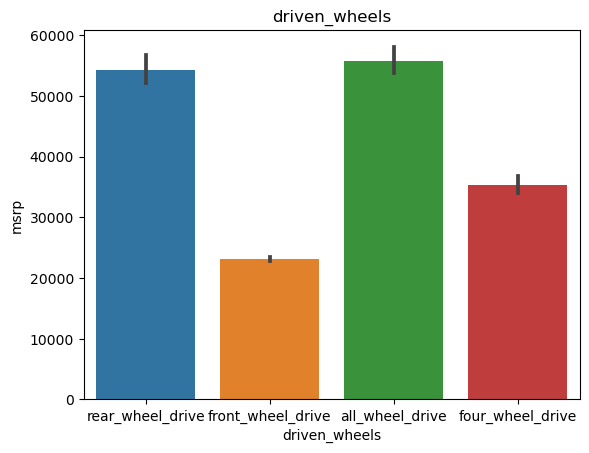

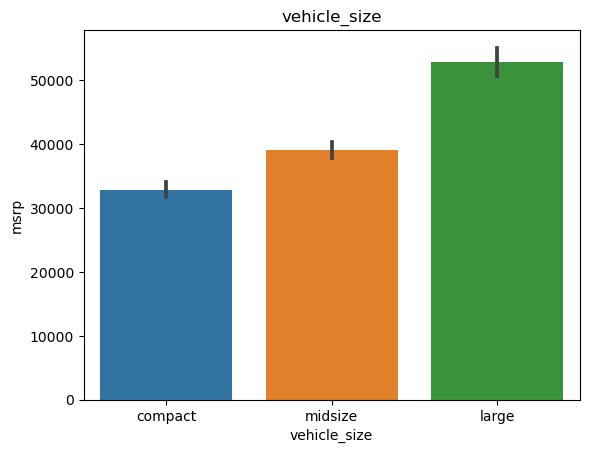

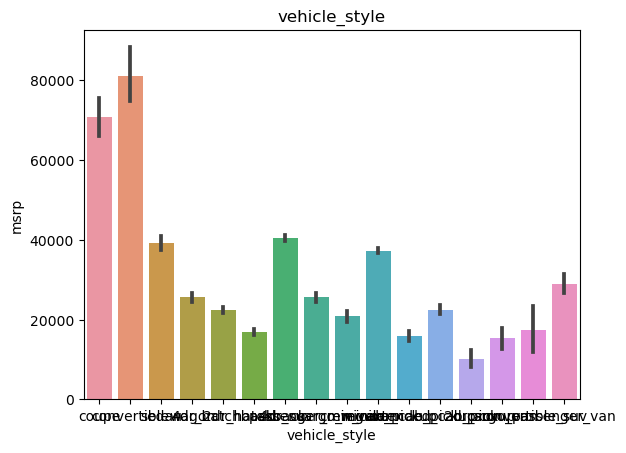

In [81]:
for col in df.columns:
    if df[col].dtype =="object":
        sns.barplot(x=df[col] , y=df["msrp"])
        plt.show(plt.title(col))

In [82]:
df["make"].nunique()

47

In [83]:
df["model"].nunique()

911

In [84]:
df["engine_fuel_type"].nunique()

10

In [85]:
df["vehicle_style"].nunique()

16

In [86]:
df.drop(["model"] , axis=1 ,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3848\312643855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["model"] , axis=1 ,inplace=True)


In [87]:
df = pd.get_dummies(df,columns=["make","vehicle_style","vehicle_size","driven_wheels","transmission_type","engine_fuel_type"])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11899 entries, 0 to 11913
Data columns (total 89 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           11899 non-null  int64  
 1   engine_hp                                                      11899 non-null  float64
 2   engine_cylinders                                               11899 non-null  float64
 3   msrp                                                           11899 non-null  int64  
 4   make_acura                                                     11899 non-null  uint8  
 5   make_alfa_romeo                                                11899 non-null  uint8  
 6   make_aston_martin                                              11899 non-null  uint8  
 7   make_audi                                                 

MODEL SCORE

In [89]:
x = df.drop(["msrp"],axis=1)
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
y = df["msrp"]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=.2, random_state=42)

In [91]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.870273951871684
0.8519948754311762
